In [1]:
#import Dependencies
%matplotlib inline
#start python import
import math,time,random,datetime
#data manipulation
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use("seaborn-whitegrid")
#preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,label_binarize
#Meachine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,linear_model,metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool,cv
#Let's be rebel and ignore warning for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading train and test data
train = pd.read_csv("C:/Users/ggggg/Downloads/train.csv")
test = pd.read_csv("C:/Users/ggggg/Downloads/test.csv")
gender_submission = pd.read_csv("C:/Users/ggggg/Downloads/gender_submission.csv")#example of what a submission should look like

In [3]:
#view the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(train)

891

In [5]:
#view the test data 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
len(test)

418

In [7]:
#view the gender_submission data
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

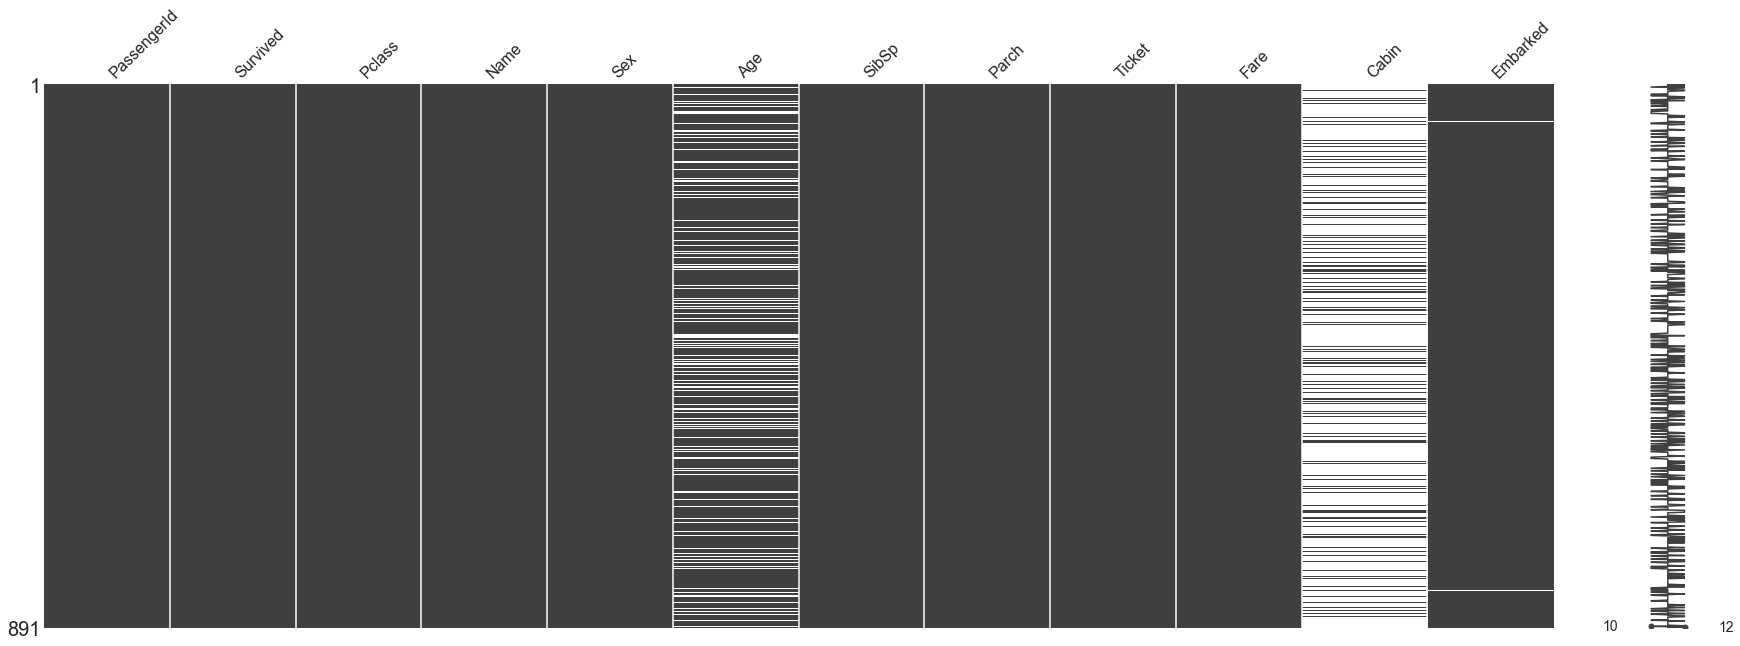

In [9]:
#plot graphic of missing values
missingno.matrix(train,figsize = (30,10))

In [10]:
#Let's wite a little function to show us how many missing values are there
def find_missing_values(df,columns):
    "Find a no. of rows whre certain columns are missing values"
    missing_vals = {}
    print("No.of missing or NaN values for each columns")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column]=df_length - total_column_values
    return missing_vals
missing_values = find_missing_values(train,columns=train.columns)
missing_values
    
    

No.of missing or NaN values for each columns


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df_bin = pd.DataFrame()#for discretized and continonus variables 
df_con = pd.DataFrame()#for continuons variables


In [13]:
#different data type in the data frame
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


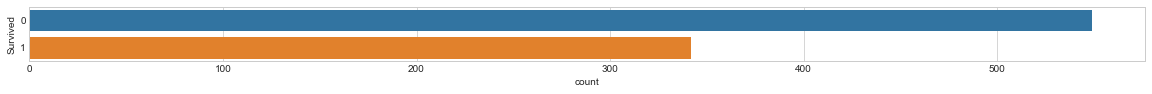

In [14]:
#how many people survived
fig = plt.figure(figsize = (20,1))
sns.countplot(y = "Survived",data = train)
print(train.Survived.value_counts())

In [15]:
#Let's add this to to our subset dataframe
df_bin["Survived"] = train["Survived"]
df_con["Survived"] = train["Survived"]

In [16]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [17]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

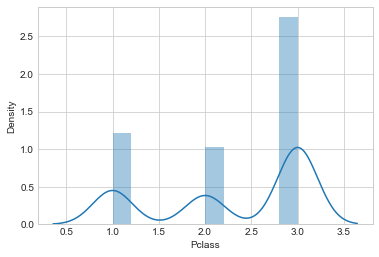

In [18]:
sns.distplot(train.Pclass)

In [19]:
#How many missing values does Pclass have
missing_values["Pclass"]

0

In [20]:
df_bin["Pclass"] = train["Pclass"]
df_con["Pclass"] = train["Pclass"]

In [21]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [22]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [23]:
#How many different names are there
train.Name.value_counts()

McCormack, Mr. Thomas Joseph                            1
Chip, Mr. Chang                                         1
Gaskell, Mr. Alfred                                     1
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)         1
Bidois, Miss. Rosalie                                   1
                                                       ..
Abbott, Mr. Rossmore Edward                             1
de Pelsmaeker, Mr. Alfons                               1
Angle, Mrs. William A (Florence "Mary" Agnes Hughes)    1
O'Leary, Miss. Hanora "Norah"                           1
Hale, Mr. Reginald                                      1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64


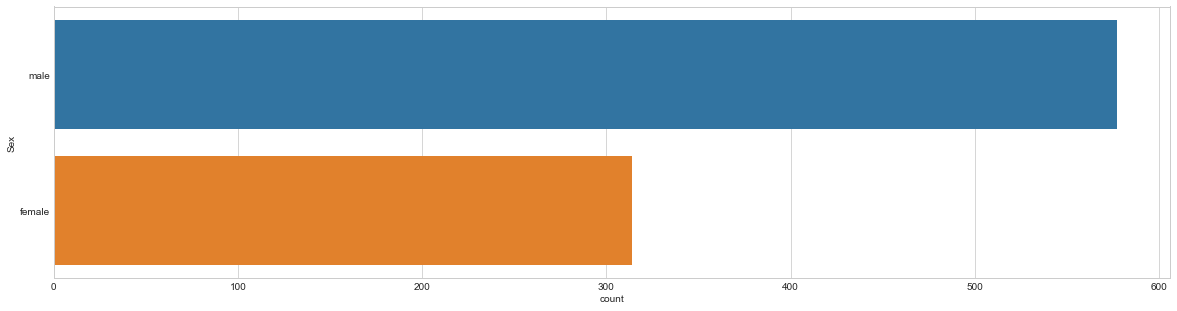

In [24]:
#Let's see a disrtibution of male and female
fig = plt.figure(figsize = (20,5))
sns.countplot(y = "Sex",data = train)
print(train.Sex.value_counts())

In [25]:
missing_values["Sex"]

0

In [26]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [27]:
#Add sex to the subset dataframe
df_bin["Sex"] = train["Sex"]
df_bin["Sex"] = np.where(df_bin["Sex"] == "female",1,0)
df_con["Sex"] = train["Sex"]

In [28]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


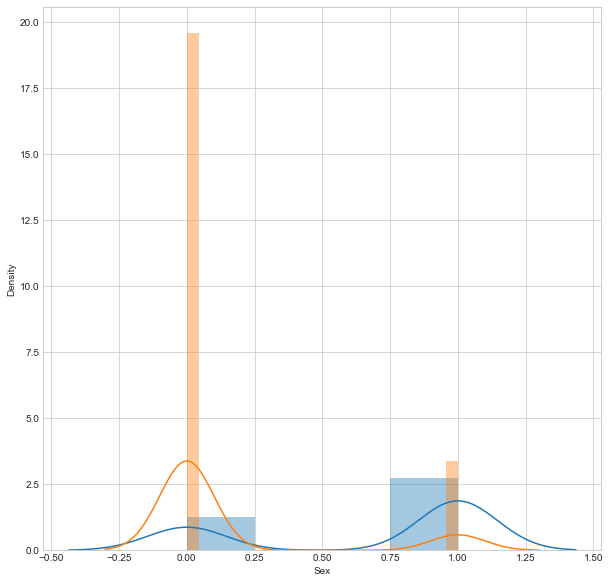

In [29]:
#How does the sex variable look compared  to the survival?
#We can see this because they both are binaries(0,1)
fig = plt.figure(figsize = (10,10))
sns.distplot(df_bin.loc[df_bin["Survived"] == 1]["Sex"],kde_kws={"label":"Survived"});
sns.distplot(df_bin.loc[df_bin["Survived"] == 0]["Sex"],kde_kws={"label":"Did not survive"});

In [30]:
#How many missing values does age have?
missing_values["Age"]#########

177

In [31]:
missing_values["SibSp"]

0

In [32]:
def plot_count_dist(data,bin_df,label_column,target_column,figsize=(20,5),use_bin_df = False):
    "Function to plot count count and distribution of a label variable and target variable side by side"
    if use_bin_df:
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column,data = bin_df);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws={"label":"Survived"});
        sns.distplot(data.loc[data[label_column]==0][target_column],
                     kde_kws={"label":"Did not survive"});
    else:
        fig = plt.figure(figsize = figsize)
        plt.subplot(1,2,1)
        sns.countplot(y = target_column,data = data);
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],
                    kde_kws = {"label":"Survived"});
        sns.distplot(data.loc[data[label_column]==0][target_column],
                    kde_kws={"label":"Did not survive"});

In [33]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
#Let's add sibsp into a dataframe
df_bin["SibSp"] = train["SibSp"]
df_con["SibSp"] = train["SibSp"]

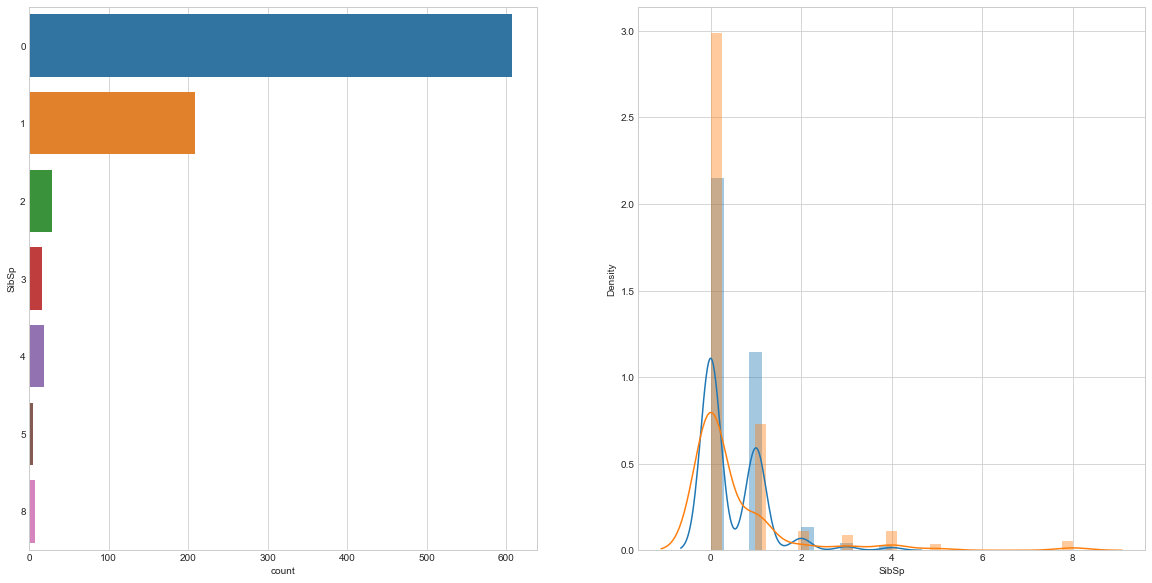

In [35]:
#visualize the count of sibsp and distribution of values
#against survived
plot_count_dist(train,
               bin_df = df_bin,
               label_column = "Survived",
               target_column = "SibSp",
               figsize = (20,10))


In [36]:
#How many missing vaklue Parch have?
missing_values["Parch"]

0

In [37]:
#What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
#Add Parch to subset dataframe
df_bin["Parch"] = train["Parch"]
df_con["Parch"] = train["Parch"]

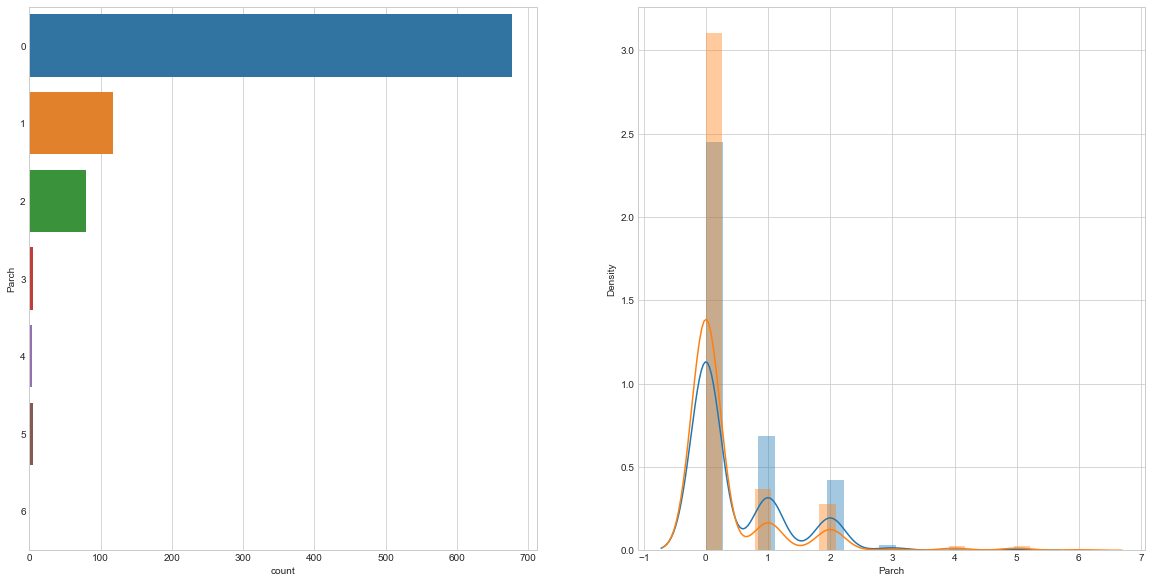

In [39]:
#visualize the count of sibsp and distribution of values
#against survived
plot_count_dist(train,
                bin_df = df_bin,
                label_column = "Survived",
                target_column = "Parch",
                figsize=(20,10))

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [42]:
#Hownany missing values tickets have?
missing_values["Ticket"]

0

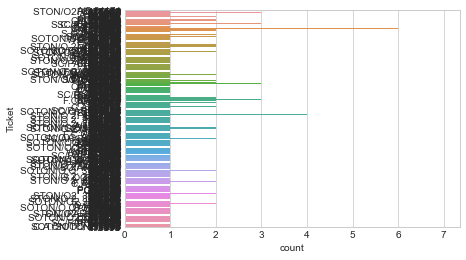

In [43]:
#How many kinds of tickets are there?
sns.countplot(y = "Ticket",data = train);

In [44]:
train.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
           ..
315082      1
11755       1
349234      1
347083      1
220367      1
Name: Ticket, Length: 681, dtype: int64

In [45]:
#How many unique kinds of tickets are there?
print("There are {} unique Ticket values".format(len(train.Ticket.unique())))

There are 681 unique Ticket values


In [46]:
#How many missing value Fare have?
missing_values["Fare"]

0

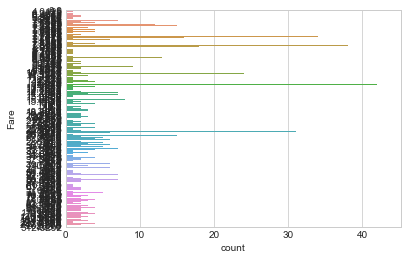

In [47]:
#How many different values of Fare are there?
sns.countplot(y = "Fare",data = train);

In [48]:
#What kind of variable in fare?
train.Fare.dtype

dtype('float64')

In [49]:
#How many unique kinds of Fare are there?
print("There are {} unique Fare value".format(len(train.Fare.unique())))

There are 248 unique Fare value


In [50]:
#Add Fare to sub dataframe?
df_bin["Fare"] = train["Fare"]
df_con["Fare"] = pd.cut(train["Fare"],bins = 5)#discretised

In [51]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,7.2500
1,1,1,1,1,0,71.2833
2,1,3,1,0,0,7.9250
3,1,1,1,1,0,53.1000
4,0,3,0,0,0,8.0500


In [52]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,"(-0.512, 102.466]"
1,1,1,female,1,0,"(-0.512, 102.466]"
2,1,3,female,0,0,"(-0.512, 102.466]"
3,1,1,female,1,0,"(-0.512, 102.466]"
4,0,3,male,0,0,"(-0.512, 102.466]"


In [53]:
df_bin.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

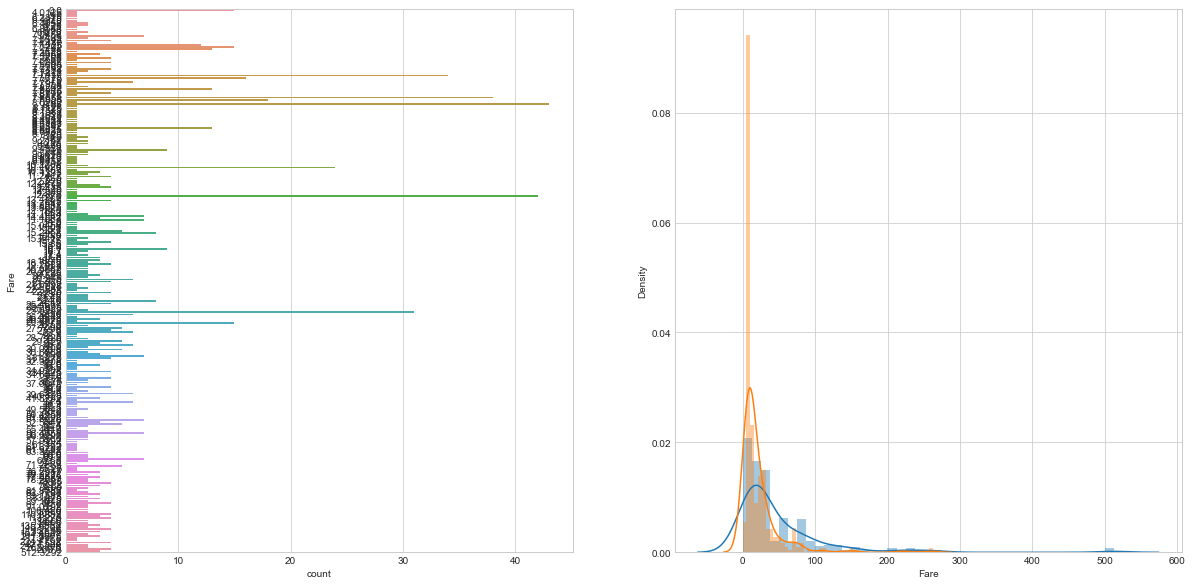

In [54]:
#Visualize the fare bin_counts as well as Fare distribution versus Survived.
plot_count_dist(data = train,
               bin_df = df_bin,
               label_column = "Survived",
               target_column = "Fare",
               figsize = (20,10),
               use_bin_df = True)

In [55]:
#How many missing value Fare have?
missing_values["Cabin"]

687

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#What values are there?
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
D              3
              ..
D56            1
C7             1
B42            1
D10 D12        1
A36            1
Name: Cabin, Length: 147, dtype: int64

In [58]:
#How many missing value Fare have?
missing_values["Embarked"]

2

In [59]:
#What values are there?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

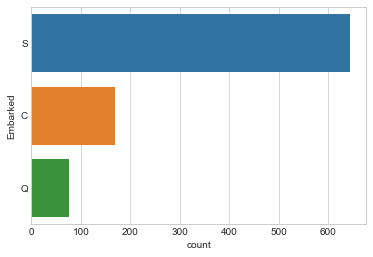

In [60]:
#What do the count look like?
sns.countplot(y = "Embarked",data = train);

In [61]:
#Let's add Embarked into a dataframe
df_bin["Embarked"] = train["Embarked"]
df_con["Embarked"] = train["Embarked"]

In [62]:
#Remove Embarked row which have missing values?
print(len(df_con))
df_con = df_con.dropna(subset = ["Embarked"])
df_bin = df_bin.dropna(subset = ["Embarked"])
print(len(df_con))

891
889


In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [65]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,"(-0.512, 102.466]",S
1,1,1,female,1,0,"(-0.512, 102.466]",C
2,1,3,female,0,0,"(-0.512, 102.466]",S
3,1,1,female,1,0,"(-0.512, 102.466]",S
4,0,3,male,0,0,"(-0.512, 102.466]",S


In [66]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [67]:
#One-hot encode binned variables:-
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove("Survived")
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Fare_211.5,Fare_221.7792,Fare_227.525,Fare_247.5208,Fare_262.375,Fare_263.0,Fare_512.3292,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,"(-0.512, 102.466]",S
1,1,1,female,1,0,"(-0.512, 102.466]",C
2,1,3,female,0,0,"(-0.512, 102.466]",S
3,1,1,female,1,0,"(-0.512, 102.466]",S
4,0,3,male,0,0,"(-0.512, 102.466]",S


In [69]:
#label encode all continuous values using label Encoder()
df_con_ec = df_con.apply(LabelEncoder().fit_transform)
df_con_ec.head(20)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,0,2
1,1,0,0,1,0,0,0
2,1,2,0,0,0,0,2
3,1,0,0,1,0,0,2
4,0,2,1,0,0,0,2
5,0,2,1,0,0,0,1
6,0,0,1,0,0,0,2
7,0,2,1,3,1,0,2
8,1,2,0,0,2,0,2
9,1,1,0,1,0,0,0


In [70]:
#Select the dataframe we want to use first for the prediction.
selected_df = df_con_ec

In [71]:
selected_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,0,2
1,1,0,0,1,0,0,0
2,1,2,0,0,0,0,2
3,1,0,0,1,0,0,2
4,0,2,1,0,0,0,2


In [72]:
#Split the dataframe into data and labels
x_train = selected_df.drop("Survived",axis = 1)#data
y_train = selected_df.Survived #labels

In [73]:
#shape of the data without labels
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,0,2
1,0,0,1,0,0,0
2,2,0,0,0,0,2
3,0,0,1,0,0,2
4,2,1,0,0,0,2


In [74]:
#Shape of the labels
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [84]:
#Function that runs the requested algorithm and return the accuracy metrics
def fit_ml_algo(algo,x_train,y_train,cv):
    #one pass
    model = algo.fit(x_train,y_train)
    acc = round(model.score(x_train,y_train) * 100,2)
    #cross validation
    train_pred = model_selection.cross_val_predict(algo,
                                                  x_train,
                                                  y_train,
                                                 cv = cv,
                                                  n_jobs = -1)
    #cross validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train,train_pred) * 100,2)
    return train_pred, acc, acc_cv
    

In [86]:
#logistic regression
start_time = time.time()
train_pred_log,acc_log,acc_cv_log = fit_ml_algo(LogisticRegression(),
                                               x_train,
                                               y_train,
                                               10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy cv 10-Fold: %s",acc_cv_log)
print("Running Time %s" % datetime.timedelta(seconds = log_time))


Accuracy: 79.08
Accuracy cv 10-Fold: %s 78.18
Running Time 0:00:00.125514
